In [30]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings


plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.figsize"] = (16,8)
plt.rc('font', family='Malgun Gothic')
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# 데이터

In [31]:
total = pd.read_csv("C:/Users/keogu/Desktop/IGPS/Data/서울시_그리드_데이터종합_수정.csv")

In [32]:
total.set_index(['대여소번호'], inplace=True)

# 회귀분석 - 수정전

## 스케일링

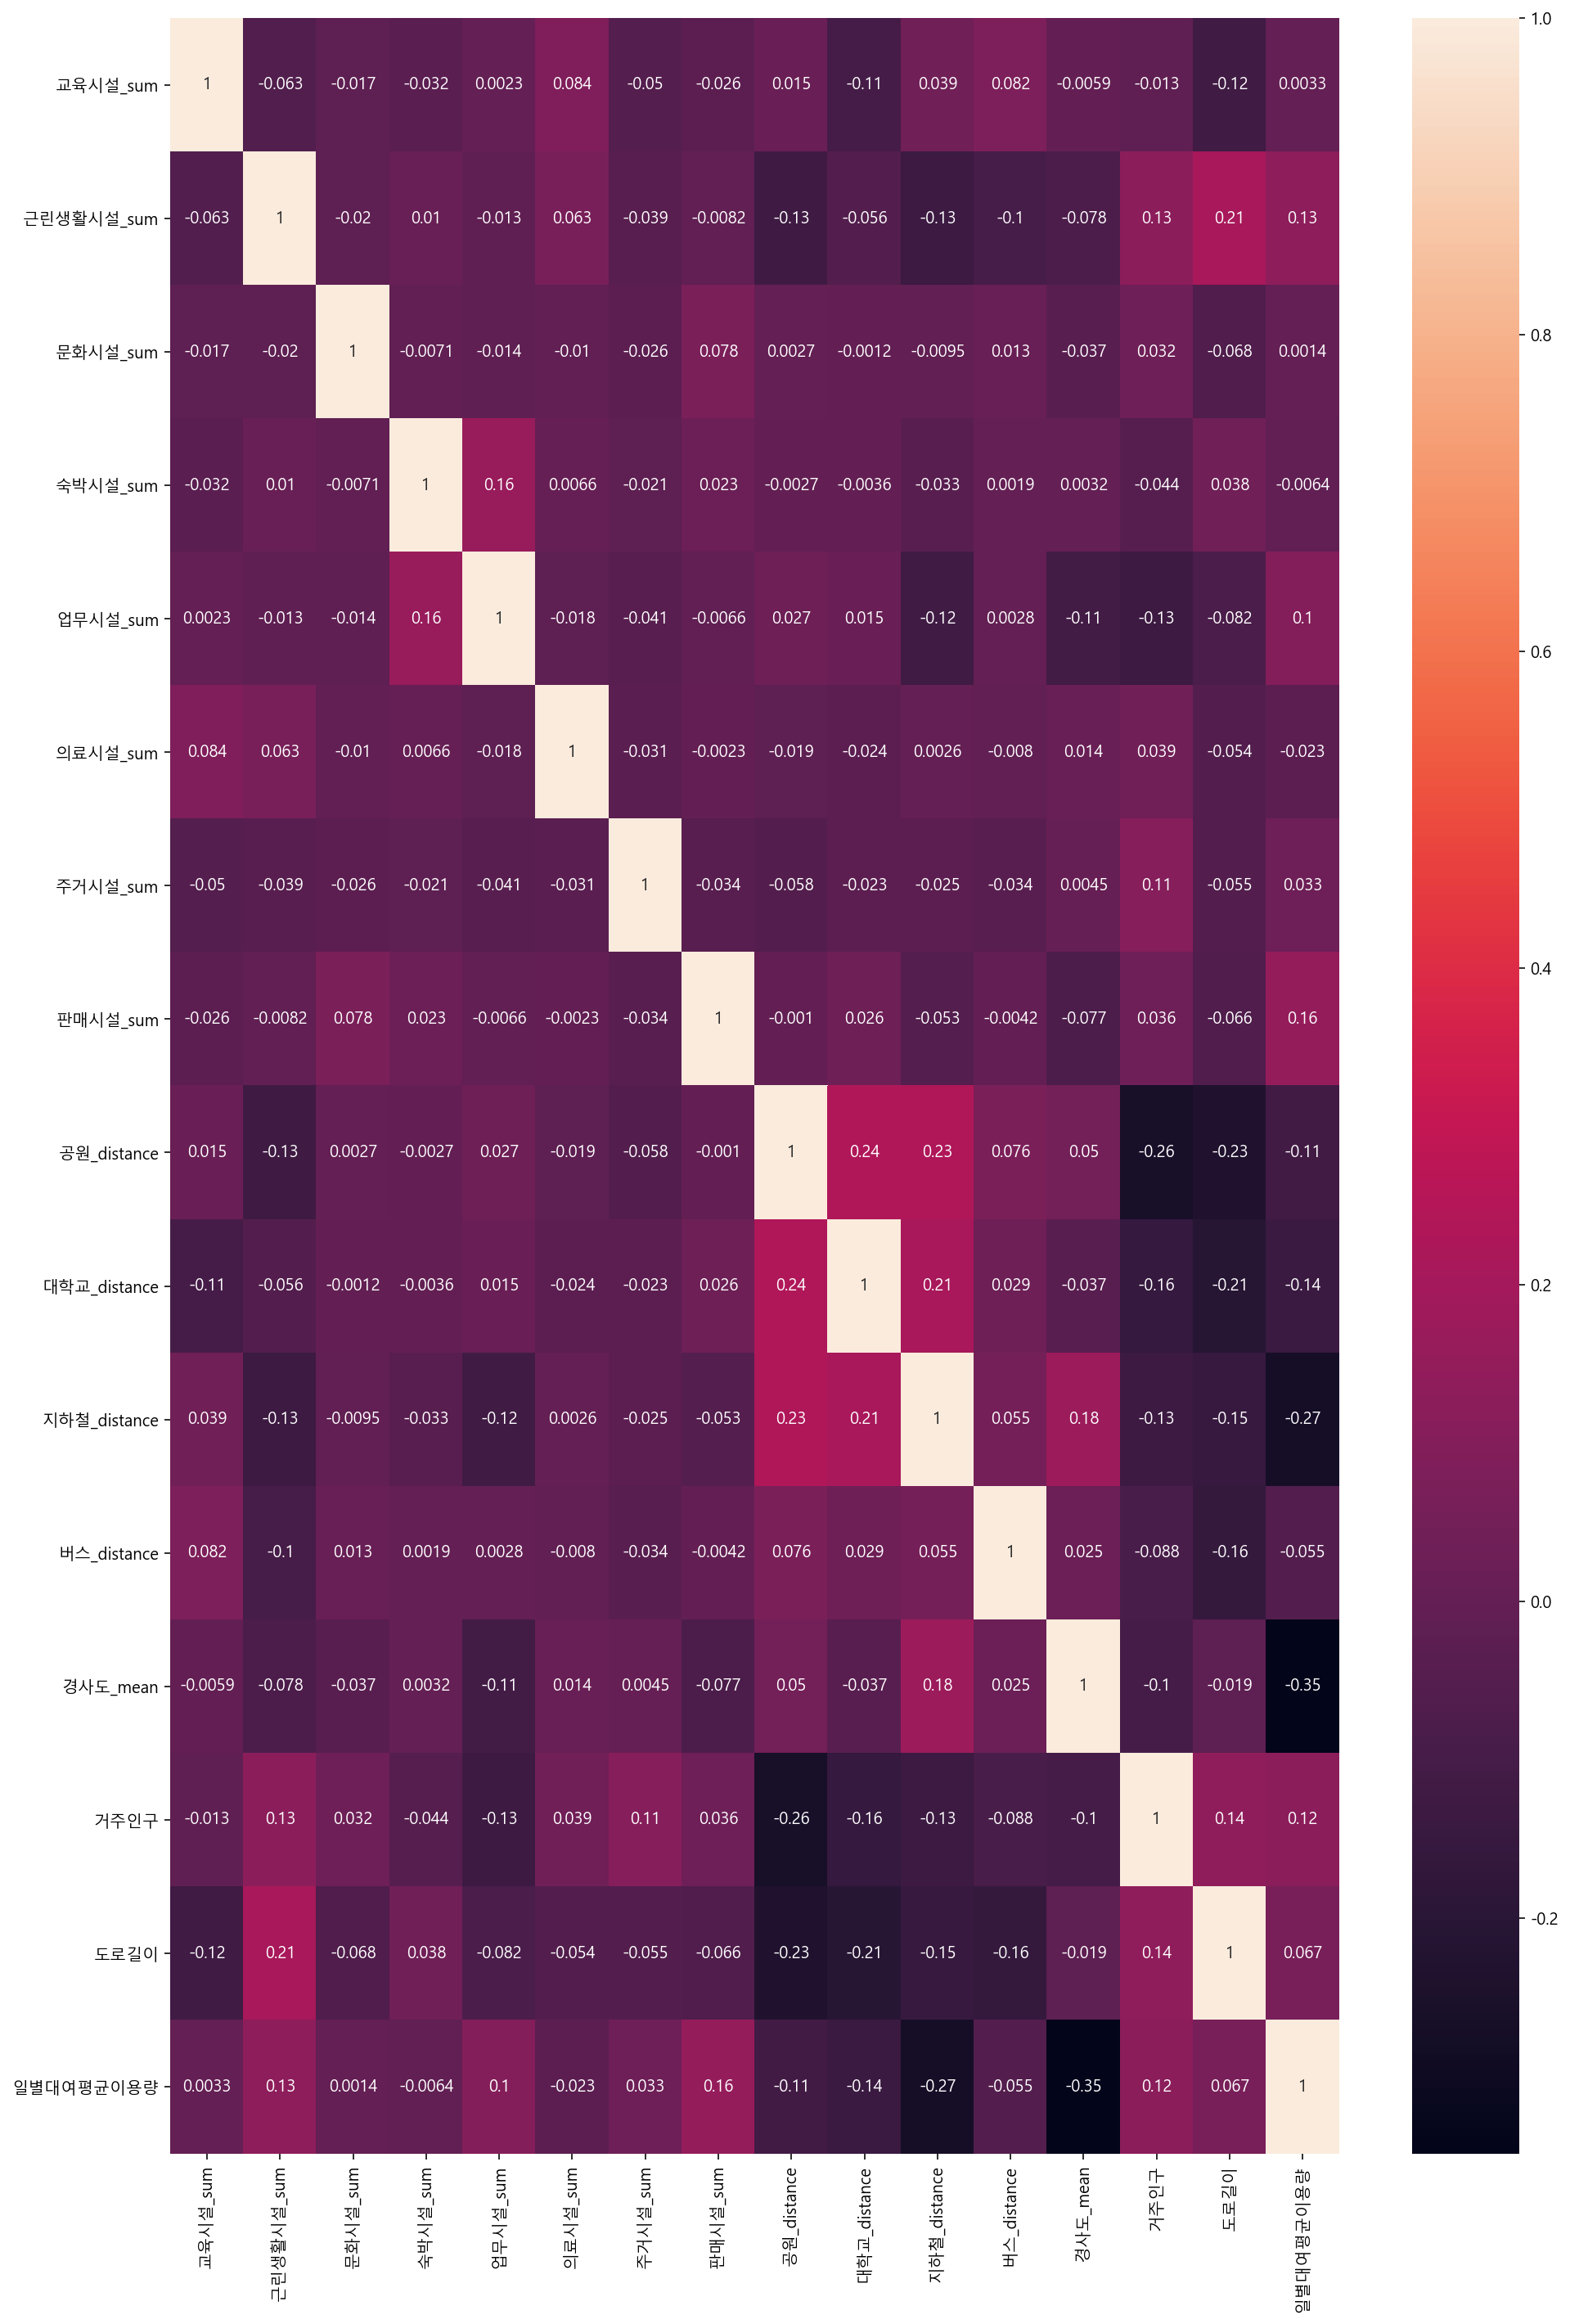

In [33]:
plt.figure(figsize=(16,24))
sns.heatmap(total.corr(), annot=True)

In [34]:
# 다중공선성 확인
from patsy import dmatrix, dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices('일별대여평균이용량 ~  교육시설_sum + 근린생활시설_sum + 문화시설_sum + 숙박시설_sum + 업무시설_sum + 의료시설_sum + 주거시설_sum + 판매시설_sum + 공원_distance + 대학교_distance + 지하철_distance + 버스_distance + 경사도_mean + 거주인구 + 도로길이', data=total, return_type = "dataframe")
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,21.7,Intercept
1,1.1,교육시설_sum
2,1.1,근린생활시설_sum
3,1.0,문화시설_sum
4,1.0,숙박시설_sum
5,1.1,업무시설_sum
6,1.0,의료시설_sum
7,1.0,주거시설_sum
8,1.0,판매시설_sum
9,1.2,공원_distance


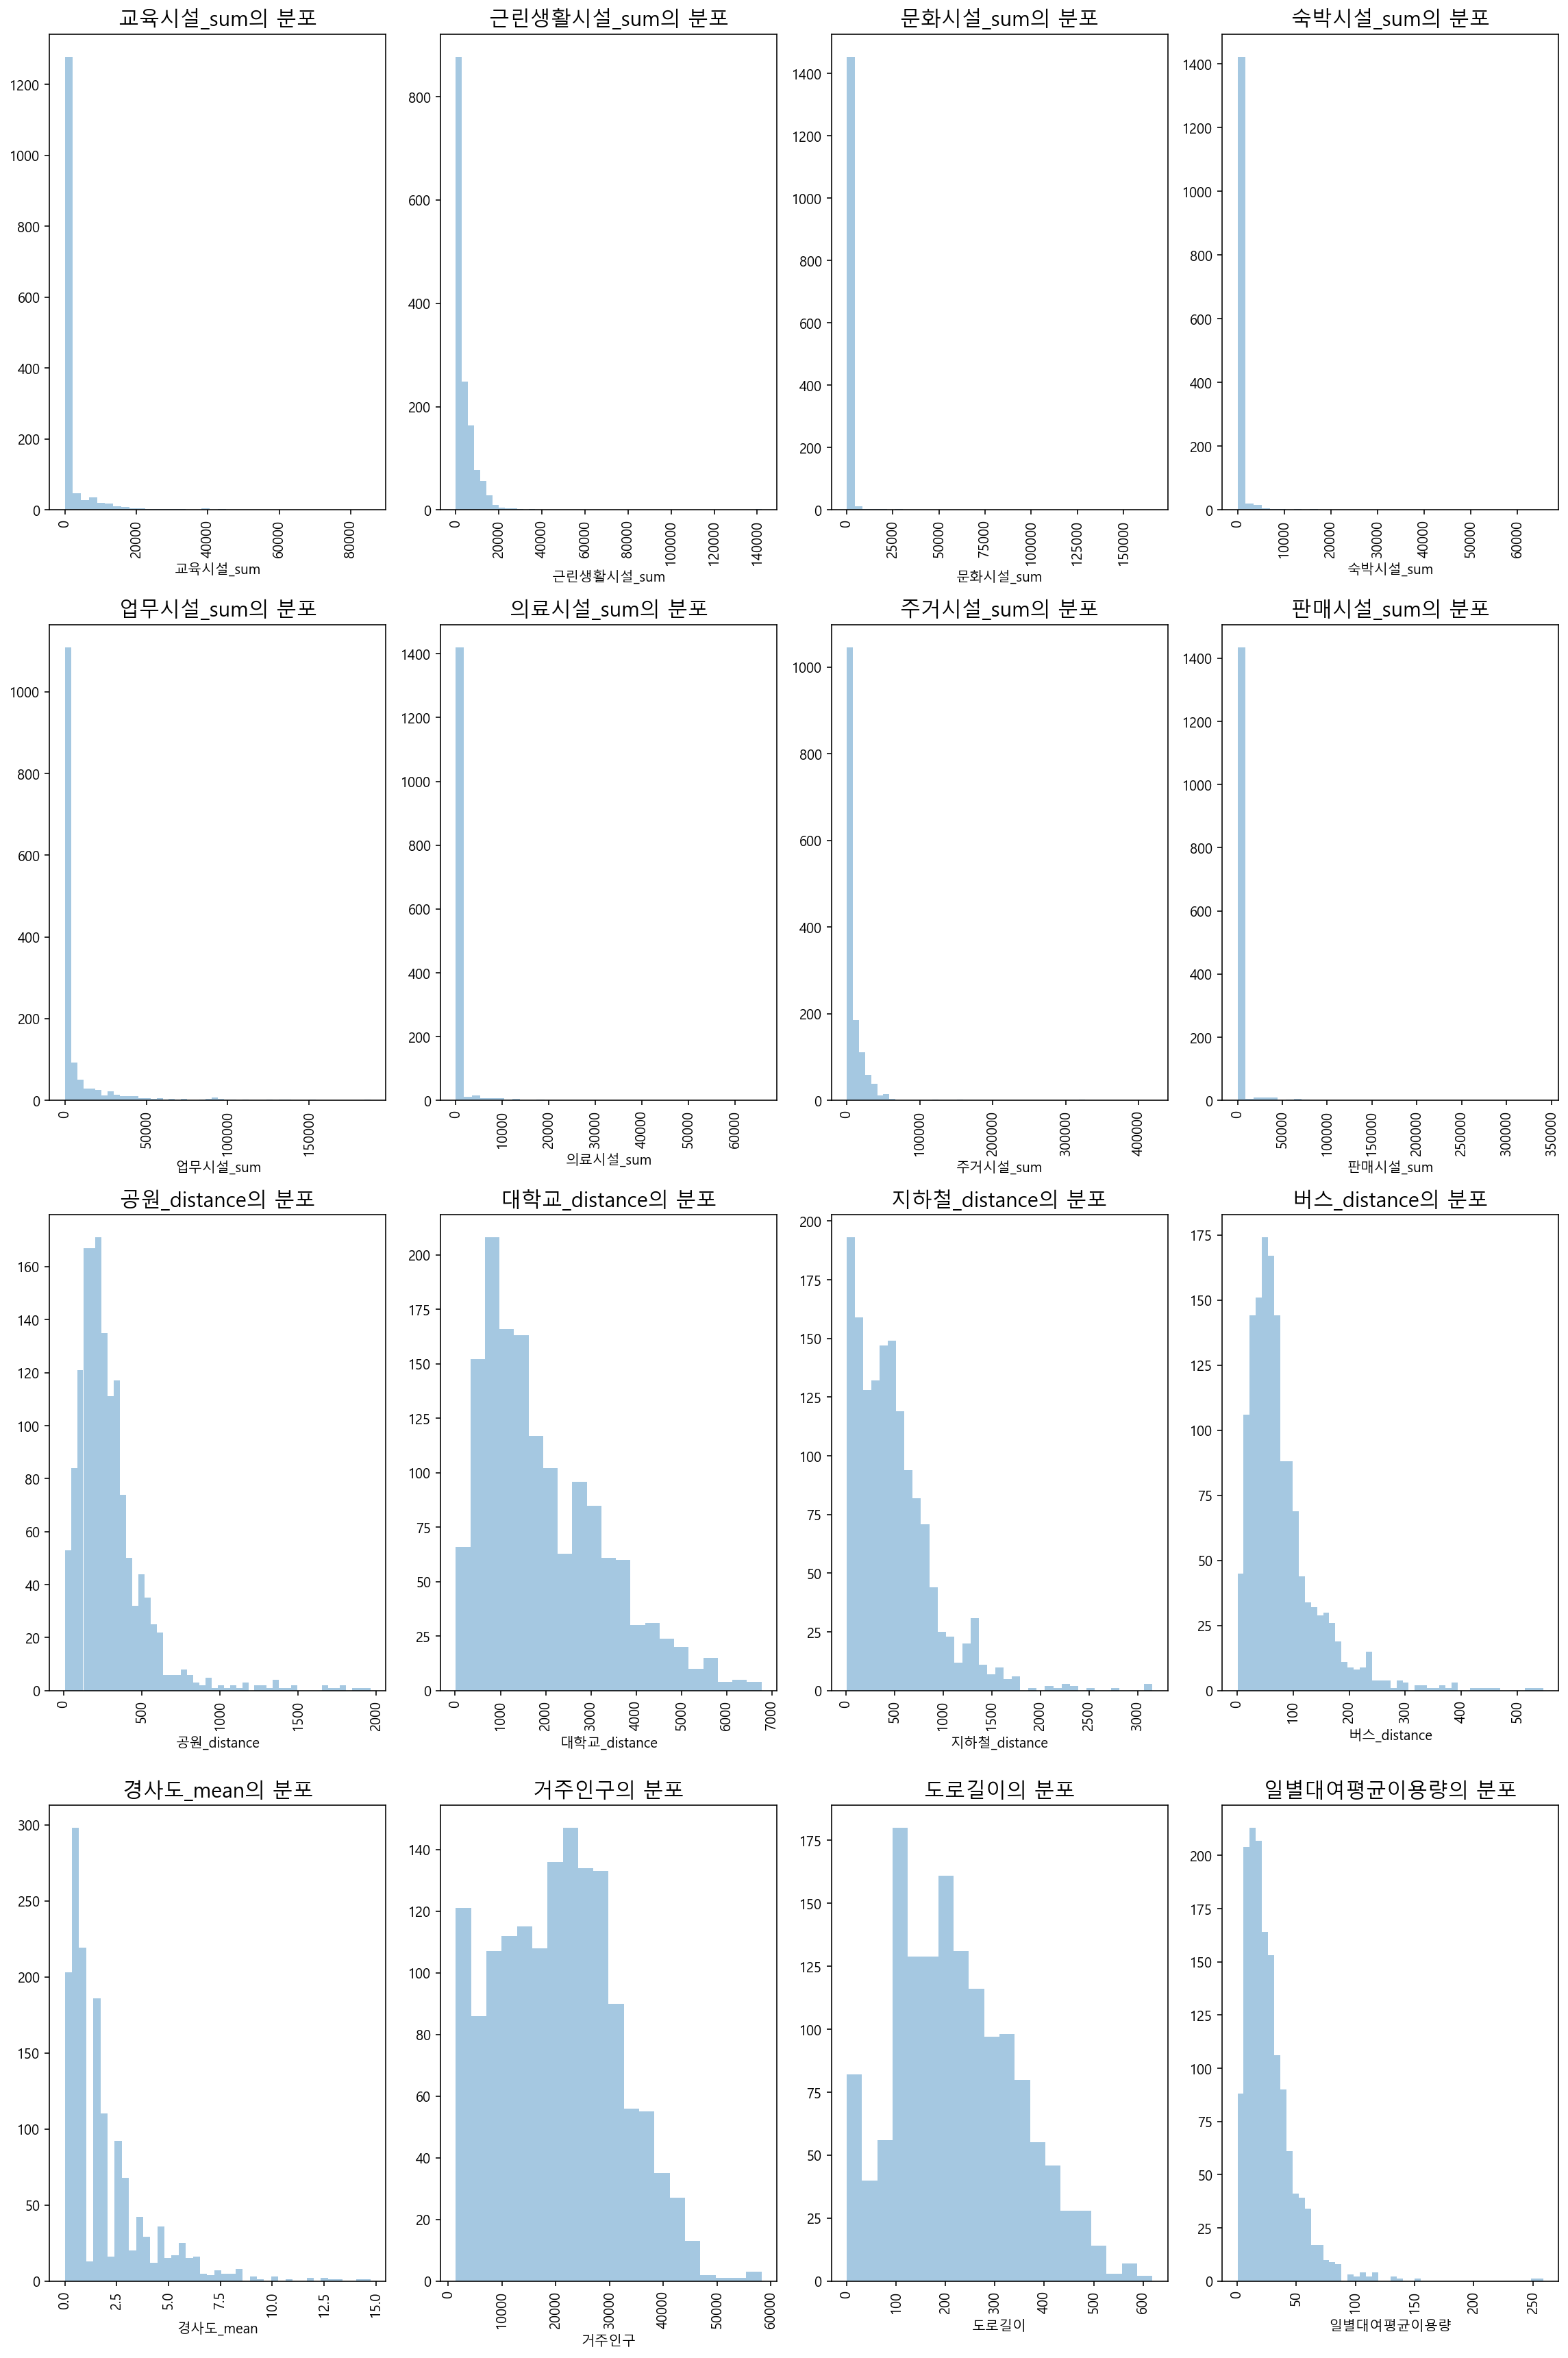

In [35]:
# 분포확인
plt.figure(figsize=(16,24)) 
n=1
for feature in total.columns:
    ax = plt.subplot(4,4,n) 
    plt.title('%s의 분포' %feature, fontsize=15)
    sns.distplot(total[feature], kde =False)
    plt.xticks(rotation=90)
    n+=1
plt.tight_layout() 
plt.show()

In [36]:
# 왜도 확인
from scipy.stats import skew

features_index = total.dtypes[total.dtypes != 'object'].index
skew_features = total[features_index].apply(lambda x : skew(x))
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

문화시설_sum        21.513978
판매시설_sum        15.773839
숙박시설_sum        14.625546
의료시설_sum        14.417179
근린생활시설_sum      10.616588
주거시설_sum        10.097895
교육시설_sum         6.354765
업무시설_sum         4.417163
공원_distance      2.968016
일별대여평균이용량        2.951318
버스_distance      2.453321
경사도_mean         2.037497
지하철_distance     1.790230
dtype: float64


In [37]:
# 복사
total_log = total.copy()

In [38]:
# log변환
total_log[skew_features_top.index] = np.log1p(total[skew_features_top.index])
total_log

,교육시설_sum,근린생활시설_sum,문화시설_sum,숙박시설_sum,업무시설_sum,의료시설_sum,주거시설_sum,판매시설_sum,공원_distance,대학교_distance,지하철_distance,버스_distance,경사도_mean,거주인구,도로길이,일별대여평균이용량
대여소번호,,,,,,,,,,,,,,,,
434,0.000000,4.801723,0.000000,0.000000,0.000000,0.0,4.018183,0.000000,5.015480,1642.164334,6.335120,3.231860,1.791759,34934.522000,212.346403,1.924149
435,0.000000,0.000000,0.000000,8.368969,11.355956,0.0,0.000000,0.000000,6.225135,1042.953142,5.712514,4.589446,1.981001,6830.952000,177.928193,2.300940
433,0.000000,6.739680,0.000000,7.060073,9.639383,0.0,6.085433,0.000000,5.826737,1020.724567,4.467282,4.529966,0.287682,3751.515000,199.707461,3.573692
826,0.000000,7.694579,0.000000,0.000000,9.368263,0.0,7.079370,0.000000,5.125402,1058.467066,5.827103,4.975238,0.693147,15547.313750,362.367275,3.319997
391,0.000000,0.000000,7.525338,0.000000,4.625169,0.0,0.000000,0.000000,5.130893,627.774040,5.890495,5.711184,0.916291,3269.474000,146.958537,2.799534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,0.000000,0.000000,10.317290,0.000000,8.135947,0.0,0.000000,0.000000,5.711408,1476.056360,5.434745,4.184183,2.014903,7757.807000,342.521270,2.572717
808,0.000000,7.332690,0.000000,0.000000,0.000000,0.0,7.846872,0.000000,6.399046,1083.238766,5.322600,3.485755,0.916291,4971.071000,113.048394,2.269156
809,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,10.015497,0.000000,4.554447,938.462006,5.176326,4.678636,0.916291,7757.807000,295.821736,3.008730


In [39]:
y_target = total_log['일별대여평균이용량']
X_features = total_log.drop('일별대여평균이용량', axis=1, inplace=False)

In [40]:
y_target_scaled = y_target.copy()
X_features_scaled = X_features.copy()

In [41]:
from sklearn.preprocessing import MinMaxScaler

#원래 값을 구하기 위해?
scaler_x = MinMaxScaler()
X_features_scaled = scaler_x.fit_transform(X_features)

scaler_y = MinMaxScaler()
y_target_scaled = scaler_y.fit_transform(y_target.values.reshape(-1,1))

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features_scaled, y_target_scaled, test_size=0.2, random_state=156)

## Sklearn

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 평가
def evaluate_regr(y,pred):
    mse = mean_squared_error(y,pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y,pred)
    r2 = r2_score(y,pred)
    print('MSE 값: {0:.3f}, RMSE 값: {1:.3f}, MAE 값: {2:.3f}, R2 값: {3:.3f}'.format(mse,rmse,mae,r2))

# 예측
def get_model_predict(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print('###', model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)

In [15]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression,ElasticNet

ridge = Ridge()
lasso = Lasso()
lr = LinearRegression()

for model in [lr, ridge, lasso]:
    get_model_predict(model, X_train, X_test, y_train, y_test)

### LinearRegression ###
MSE 값: 0.013, RMSE 값: 0.116, MAE 값: 0.092, R2 값: 0.313
### Ridge ###
MSE 값: 0.013, RMSE 값: 0.115, MAE 값: 0.092, R2 값: 0.314
### Lasso ###
MSE 값: 0.019, RMSE 값: 0.140, MAE 값: 0.111, R2 값: -0.002


### 파라미터 조정

In [16]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid = params, scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_train, y_train)
    rmse = np.sqrt(-1 * grid_model.best_score_)
    print('{0} 5 CV시 최적 평균 RMSE 값:{1}, 최적 alpha:{2}'.format(model.__class__.__name__, np.round(rmse,4),grid_model.best_params_))

In [17]:
Ridge_alp_list=[]
alp = np.arange(0,100,0.01)
for i in alp:
    Ridge_alp_list.append(round(i,2))
    
Lasso_alp_list=[]
alp = np.arange(0,1,0.01)
for i in alp:
    Lasso_alp_list.append(round(i,2))

In [18]:
ridge_params = {'alpha':Ridge_alp_list}
lasso_params = {'alpha':Lasso_alp_list}

In [19]:
print_best_params(ridge, ridge_params)

Ridge 5 CV시 최적 평균 RMSE 값:0.1161, 최적 alpha:{'alpha': 2.92}


In [20]:
print_best_params(lasso, lasso_params)

Lasso 5 CV시 최적 평균 RMSE 값:0.1162, 최적 alpha:{'alpha': 0.0}


In [43]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression,ElasticNet

ridge = Ridge(alpha=2.92)
lasso = Lasso(alpha=0)
lr = LinearRegression()

for model in [lr, ridge, lasso]:
    get_model_predict(model, X_train, X_test, y_train, y_test)

### LinearRegression ###
MSE 값: 0.013, RMSE 값: 0.116, MAE 값: 0.092, R2 값: 0.313
### Ridge ###
MSE 값: 0.013, RMSE 값: 0.115, MAE 값: 0.092, R2 값: 0.316
### Lasso ###
MSE 값: 0.013, RMSE 값: 0.116, MAE 값: 0.092, R2 값: 0.313


In [22]:
def get_top_bottom_coef(model): 
    coef = pd.Series(data = model.coef_.flatten(), index = X_features.columns )
    coef = coef.sort_values(ascending=False)
    return coef

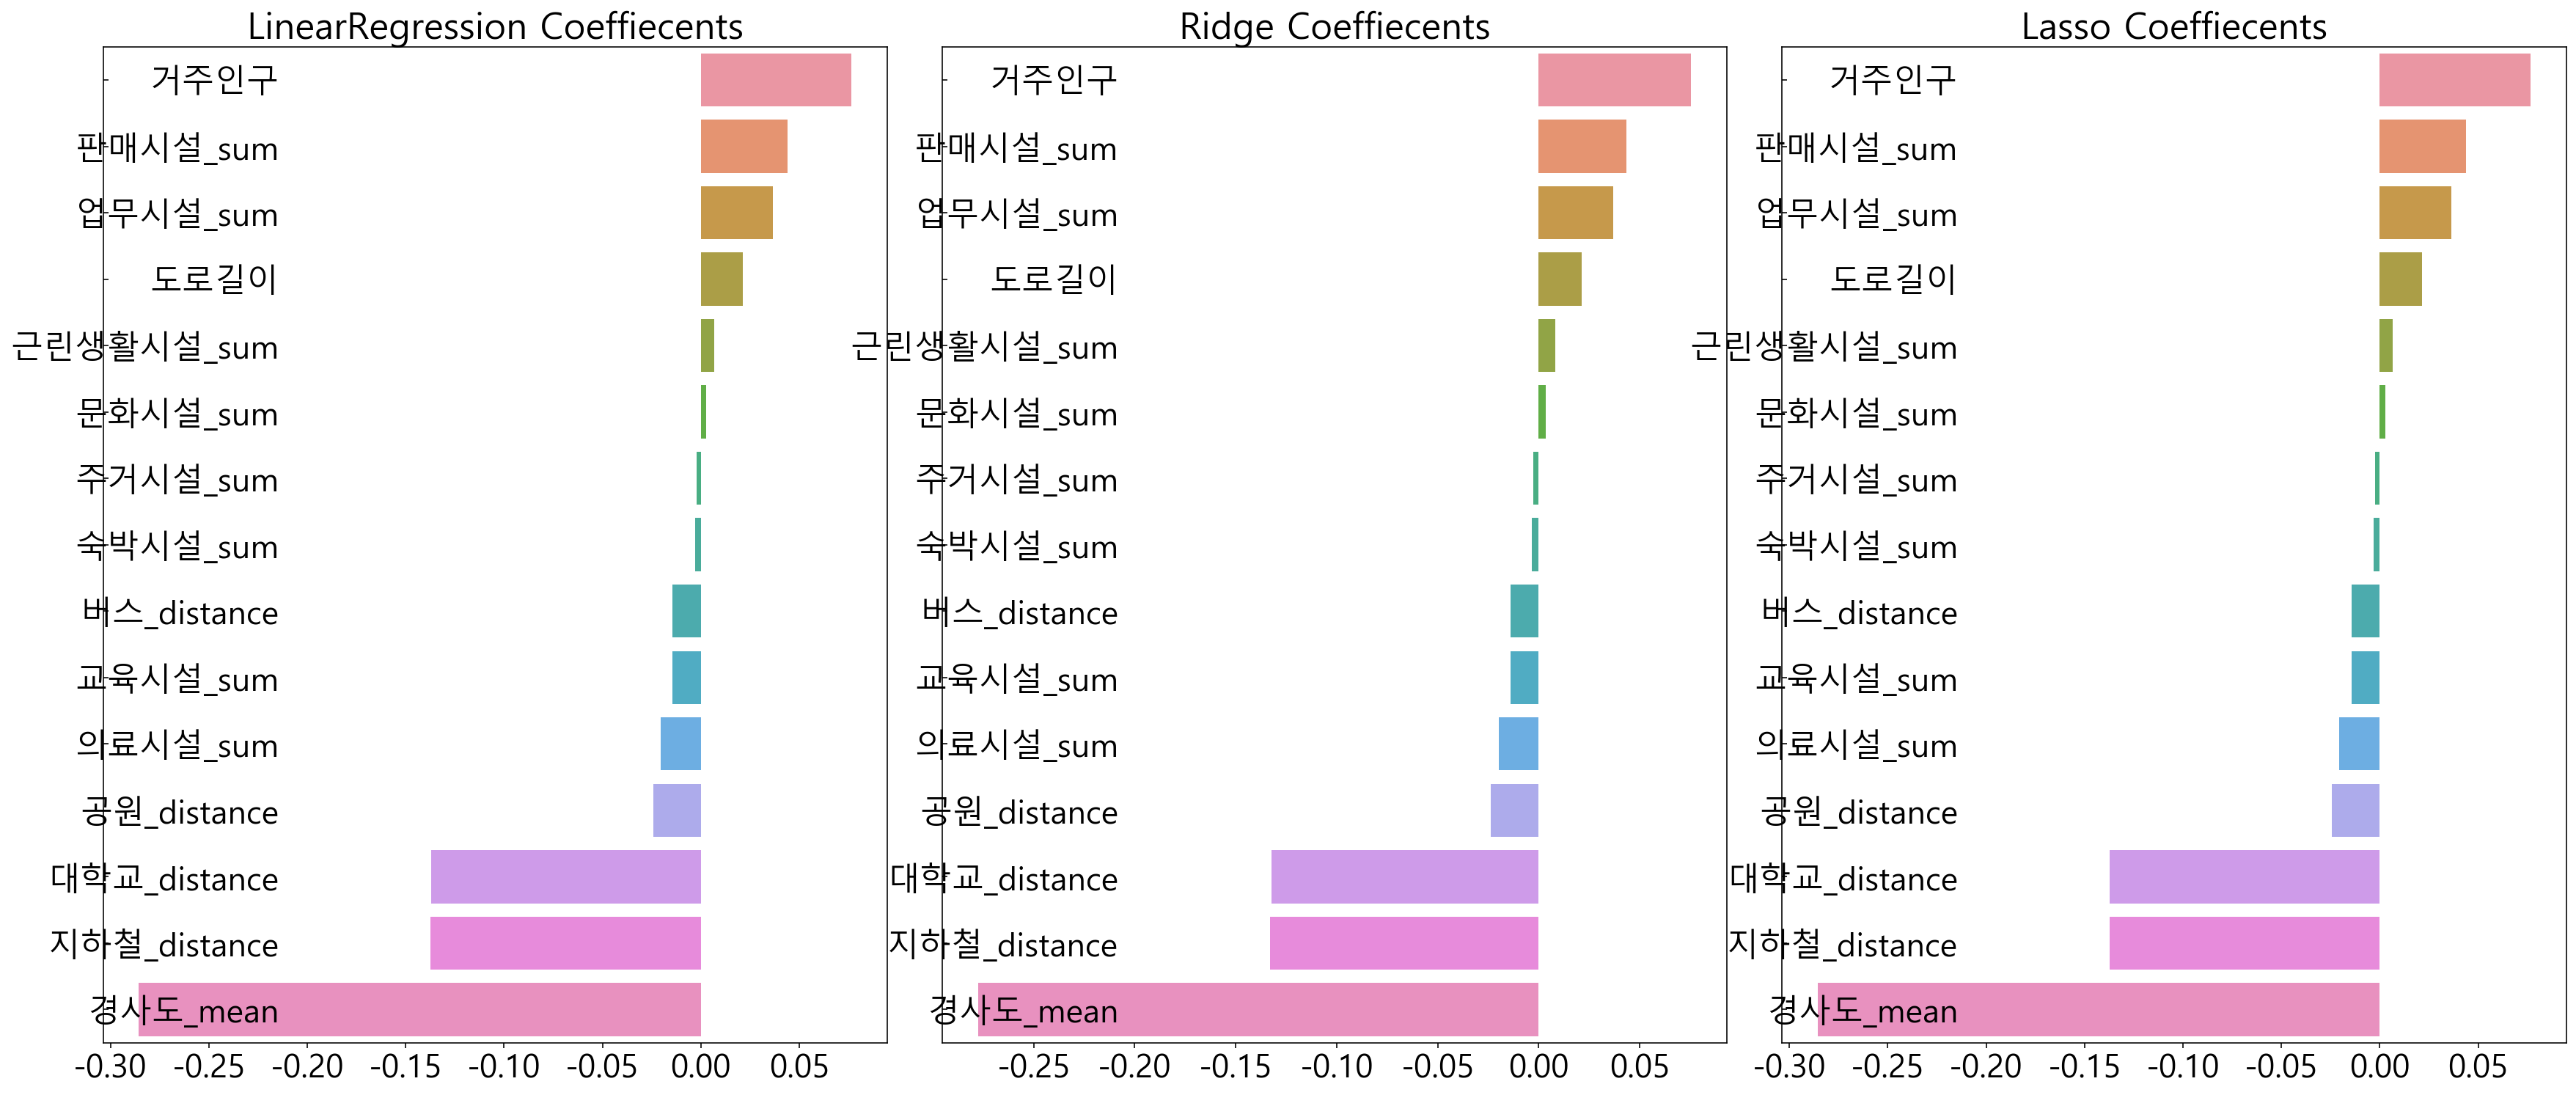

In [23]:
def visualize_coefficient(models):
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=3)
    fig.tight_layout() 
    for i_num, model in enumerate(models): 
        coef_concat = get_top_bottom_coef(model) 
        axs[i_num].set_title(model.__class__.__name__+' Coeffiecents', size=25)
        axs[i_num].tick_params(axis="y",direction="in", pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])
  
models = [lr, ridge, lasso]
visualize_coefficient(models)

In [24]:
get_top_bottom_coef(lr)

거주인구            0.076611
판매시설_sum        0.043938
업무시설_sum        0.036492
도로길이            0.021341
근린생활시설_sum      0.006653
문화시설_sum        0.002863
주거시설_sum       -0.002267
숙박시설_sum       -0.002988
버스_distance    -0.014393
교육시설_sum       -0.014409
의료시설_sum       -0.020469
공원_distance    -0.024269
대학교_distance   -0.137138
지하철_distance   -0.137384
경사도_mean       -0.285609
dtype: float64

## 예측값

In [25]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)

evaluate_regr(y_test, pred_lr)

MSE 값: 0.013, RMSE 값: 0.116, MAE 값: 0.092, R2 값: 0.313


In [26]:
y_test = scaler_y.inverse_transform(np.array(y_test).reshape(-1,1))
y_test = np.expm1(y_test)

pred_lr= scaler_y.inverse_transform(np.array(pred_lr).reshape(-1,1))
pred_lr = np.expm1(pred_lr)

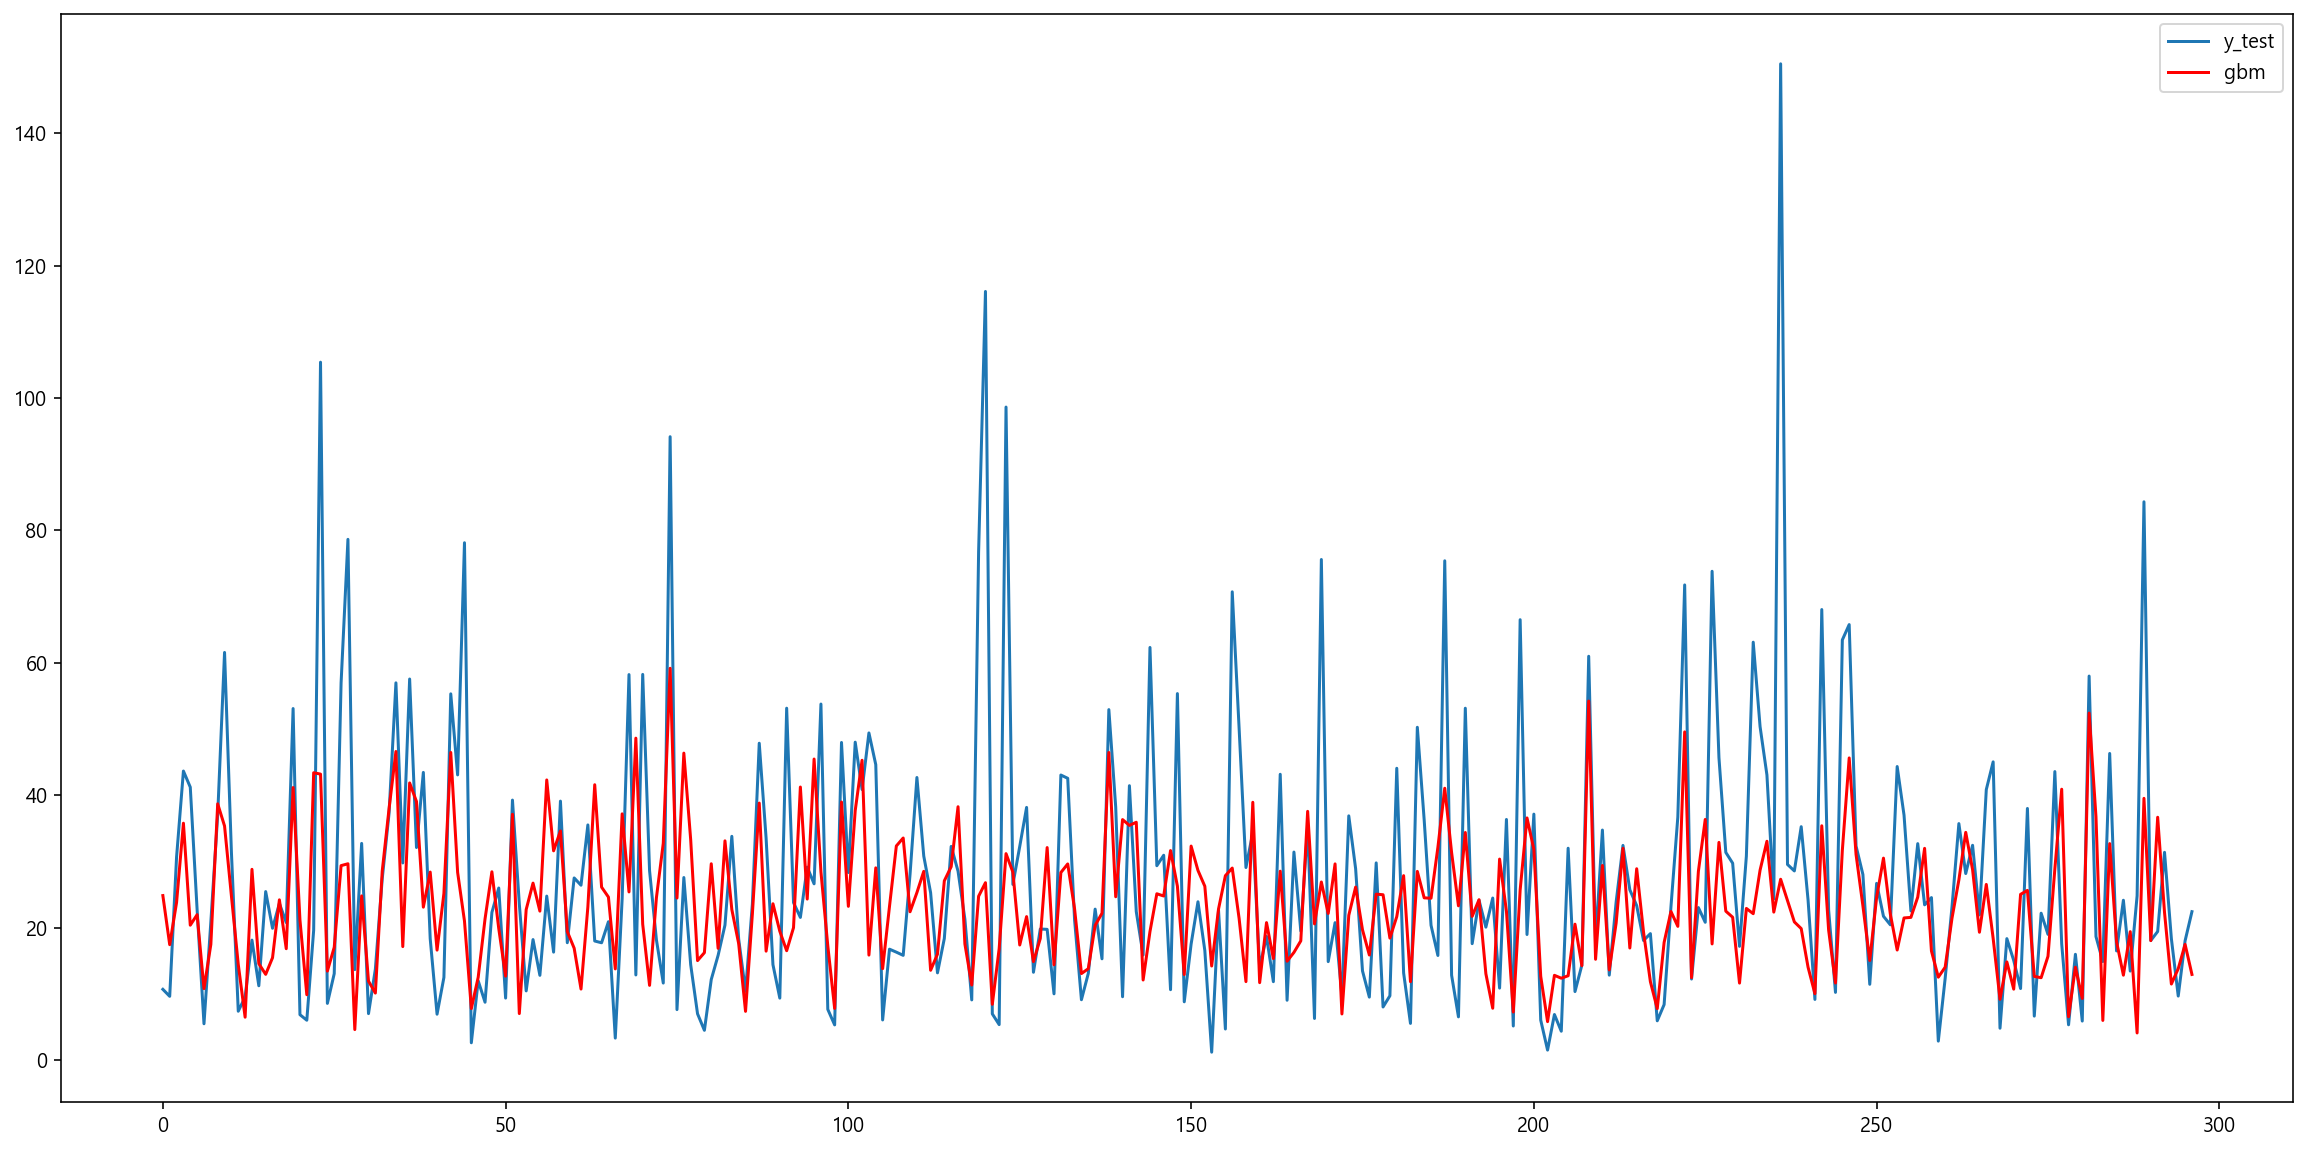

In [27]:
plt.figure(figsize=(20,10))
plt.plot(y_test, label='y_test')
plt.plot(pred_lr, 'r', label='gbm')
plt.legend()
plt.show()

In [28]:
pred_lr

array([[24.84494348],
       [17.42663268],
       [23.79640079],
       [35.77866154],
       [20.37135477],
       [21.95943366],
       [10.78246529],
       [17.46059522],
       [38.7047967 ],
       [35.35489134],
       [24.8035578 ],
       [14.44556477],
       [ 6.4706087 ],
       [28.81119609],
       [14.55692518],
       [12.94248819],
       [15.45753369],
       [24.20131952],
       [16.81662203],
       [41.16667734],
       [21.15508567],
       [ 9.86409402],
       [43.39889384],
       [43.19480752],
       [13.43226796],
       [17.03328326],
       [29.36770092],
       [29.64931211],
       [ 4.60153663],
       [24.79899121],
       [11.92016928],
       [10.11391868],
       [28.5168274 ],
       [37.99992214],
       [46.61292772],
       [17.13611454],
       [41.86086776],
       [39.05347706],
       [23.09272755],
       [28.39518601],
       [16.60486589],
       [25.17133769],
       [46.46447221],
       [28.35296927],
       [20.99915089],
       [ 7